# The Price of Life – Analyzing the Efficiency of Global Healthcare Spending

## 1. Objective and Research Question
<b>Research Question:</b> Is there any correlation between Healthcare Spending and Life Expectancy?
<p> In public policy, "Allocative Efficiency" is an important topic. Governments must decide how much of their money to spend on public health versus infrastructure or education.  Intuitively, we anticipate a positive correlation: increased resources (hospitals, doctors, and medicine) should result in better health outcomes. However, I believe the relationship between those two is nonlinear and follows the Law of Diminishing Marginal Returns.  While greater spending, in theory, will benefit developing countries, developed countries may experience a "plateau" in which additional spending yields only small gains in longevity. </p>

## 2. Data Sources
To investigate this, I merged two datasets from the World Bank Open Data portal, focusing on the year 2020 (or latest available common year):
1. [Current Health Expenditure (% of GDP)](https://api.worldbank.org/v2/en/indicator/SH.XPD.CHEX.GD.ZS?downloadformat=csv): The level of total health expenditure expressed as a percentage of the country's Gross Domestic Product.
2. [Life Expectancy at Birth (Total Years)](https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv): The average number of years a newborn is expected to live if mortality patterns at the time of birth remain constant.

### 2.1 Data Cleaning
#### 2.1.1 Health Expenditure
NB: I need to delete first 5 rows using Ms Excel because it contains data and the header starts at row #6. It makes pandas cannot read the CSV file.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# # Display all rows and columns (adjust numbers as needed)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Show full text in each cell (no truncation)
# pd.set_option('display.max_colwidth', None)

# # Expand the display width so wide tables don't wrap
# pd.set_option('display.width', 0)

health = pd.read_csv("world_health_expenditure_ed.csv")
health.sample(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
78,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Early-demographic dividend,EAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.098549,5.028390,4.862235,4.694208,4.627530,5.046755,5.072747,4.703147,NaN,NaN
14,Austria,AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.367467,10.352263,10.384026,10.348856,10.487536,11.316411,12.152286,11.157293,10.877799,NaN
29,Brazil,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.909300,9.169017,9.471251,9.464750,9.614491,9.623265,9.636465,9.142775,NaN,NaN
147,St. Martin (French part),MAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<p> As we can see from table above, many countries data start in the year 2000. Therefore, we should drop the column before 2000. Additionally, we should also drop the data from 2023-2024 because many countries data are missing </p>

In [2]:
years_to_drop = [str(year) for year in range(1960, 2000)]
# Dropping 2023 - 2024 because the data is not complete, some country have it but some other have not.
years_to_drop.extend(["2023", "2024"])

health = health.drop(columns=years_to_drop, errors="ignore")
health

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,5.654027,5.813231,5.442299,6.023682,6.109320,5.955198,5.972892,5.994838,...,6.161271,5.820881,5.971391,6.067786,5.929017,5.789155,5.812676,6.035806,6.044468,5.727920
2,Afghanistan,AFG,NaN,NaN,9.443391,8.941258,9.808474,9.948289,10.622766,9.904675,...,8.805964,9.528878,10.105348,11.818590,12.620817,14.208419,14.831320,15.533614,21.508461,23.088169
3,Africa Western and Central,AFW,3.462852,3.486867,3.140402,4.437640,4.279378,4.132311,4.060231,3.845552,...,3.609185,3.637259,3.872041,3.834696,3.742529,3.304625,3.328975,3.892964,4.152319,4.209822
4,Angola,AGO,1.908599,4.483516,3.329461,3.547973,3.967199,2.852195,2.685535,2.974391,...,2.732827,2.434129,2.605795,2.713150,2.793838,2.594822,2.475188,3.274885,3.092771,2.927376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,4.666066,4.945148,4.832380,5.757583,5.514404,5.205853,5.529302,5.820776,...,4.960832,4.841805,4.252857,4.845067,4.847699,5.272018,5.838126,5.772708,6.175427,6.186667
263,South Africa,ZAF,7.336619,7.123279,6.677745,7.040982,6.938416,6.862162,6.876509,6.905108,...,8.103223,7.871366,8.053042,8.079594,7.977112,8.081965,8.246526,9.013292,8.674328,8.770866
264,Zambia,ZMB,4.173656,4.829957,5.888452,5.995536,5.484906,6.330887,5.577423,4.579614,...,4.573905,3.829242,4.429743,4.469232,4.781562,4.769967,6.753303,6.306744,6.639514,5.255923


In [3]:
# Checking whether the numbers are actual numbers (Integer or Float) or string
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          232 non-null    float64
 3   2001          232 non-null    float64
 4   2002          233 non-null    float64
 5   2003          235 non-null    float64
 6   2004          235 non-null    float64
 7   2005          235 non-null    float64
 8   2006          235 non-null    float64
 9   2007          235 non-null    float64
 10  2008          235 non-null    float64
 11  2009          235 non-null    float64
 12  2010          236 non-null    float64
 13  2011          237 non-null    float64
 14  2012          237 non-null    float64
 15  2013          238 non-null    float64
 16  2014          238 non-null    float64
 17  2015          238 non-null    float64
 18  2016          238 non-null    

In [4]:
# Drop every row with NaN value
health = health.dropna()
health

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Africa Eastern and Southern,AFE,5.654027,5.813231,5.442299,6.023682,6.109320,5.955198,5.972892,5.994838,...,6.161271,5.820881,5.971391,6.067786,5.929017,5.789155,5.812676,6.035806,6.044468,5.727920
3,Africa Western and Central,AFW,3.462852,3.486867,3.140402,4.437640,4.279378,4.132311,4.060231,3.845552,...,3.609185,3.637259,3.872041,3.834696,3.742529,3.304625,3.328975,3.892964,4.152319,4.209822
4,Angola,AGO,1.908599,4.483516,3.329461,3.547973,3.967199,2.852195,2.685535,2.974391,...,2.732827,2.434129,2.605795,2.713150,2.793838,2.594822,2.475188,3.274885,3.092771,2.927376
5,Albania,ALB,5.944198,5.925845,5.664645,5.911408,5.893649,5.729545,5.631770,5.926091,...,6.282863,6.434511,6.464119,6.729327,6.578488,6.668446,6.862141,7.503894,7.399132,6.193681
6,Andorra,AND,5.952764,5.858237,5.996212,5.547715,5.288469,5.594769,4.965300,4.923473,...,6.799642,6.773080,6.915864,6.905218,7.071426,7.375417,7.323246,8.786739,8.334507,7.536788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,World,WLD,8.616849,9.005033,9.353245,9.503464,9.395284,9.328074,9.244761,9.084582,...,9.328072,9.432874,9.710148,9.843793,9.725431,9.647710,9.781081,10.858845,10.339993,9.886662
260,Samoa,WSM,4.282325,3.818050,4.492055,4.172371,4.525785,4.633655,4.884514,4.744633,...,6.218239,6.257942,6.214384,5.639508,5.163468,4.775533,5.647486,6.186673,6.812557,6.301209
262,"Yemen, Rep.",YEM,4.666066,4.945148,4.832380,5.757583,5.514404,5.205853,5.529302,5.820776,...,4.960832,4.841805,4.252857,4.845067,4.847699,5.272018,5.838126,5.772708,6.175427,6.186667
263,South Africa,ZAF,7.336619,7.123279,6.677745,7.040982,6.938416,6.862162,6.876509,6.905108,...,8.103223,7.871366,8.053042,8.079594,7.977112,8.081965,8.246526,9.013292,8.674328,8.770866


In [5]:
# Dropping non-countries from the table
non_countries = [
    "AFE",
    "AFW",
    "ARB",
    "CEB",
    "CSS",
    "EAP",
    "EAR",
    "EAS",
    "ECA",
    "ECS",
    "EMU",
    "EUU",
    "FCS",
    "HIC",
    "HPC",
    "IBD",
    "IBT",
    "IDA",
    "IDB",
    "IDX",
    "LAC",
    "LCN",
    "LDC",
    "LIC",
    "LMC",
    "LMY",
    "LTE",
    "MEA",
    "MIC",
    "MNA",
    "NAC",
    "OED",
    "OSS",
    "PRE",
    "PSS",
    "PST",
    "SAS",
    "SSA",
    "SSF",
    "SST",
    "TEA",
    "TEC",
    "TLA",
    "TMN",
    "TSA",
    "TSS",
    "UMC",
    "WLD",
]

health = health[~health["Country Code"].isin(non_countries)]
health

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4,Angola,AGO,1.908599,4.483516,3.329461,3.547973,3.967199,2.852195,2.685535,2.974391,...,2.732827,2.434129,2.605795,2.713150,2.793838,2.594822,2.475188,3.274885,3.092771,2.927376
5,Albania,ALB,5.944198,5.925845,5.664645,5.911408,5.893649,5.729545,5.631770,5.926091,...,6.282863,6.434511,6.464119,6.729327,6.578488,6.668446,6.862141,7.503894,7.399132,6.193681
6,Andorra,AND,5.952764,5.858237,5.996212,5.547715,5.288469,5.594769,4.965300,4.923473,...,6.799642,6.773080,6.915864,6.905218,7.071426,7.375417,7.323246,8.786739,8.334507,7.536788
8,United Arab Emirates,ARE,2.395045,2.484364,2.717709,2.646344,2.462256,2.320211,2.325414,2.566027,...,3.502222,3.534055,3.466094,3.895801,4.008550,4.098542,4.402913,5.824770,5.304943,4.675509
9,Argentina,ARG,8.220011,8.371799,7.393312,6.894516,7.228683,7.610789,7.640328,7.834551,...,9.780979,9.671300,10.229337,9.855589,10.231748,10.291469,10.155511,10.450306,10.038322,9.863053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Vanuatu,VUT,3.306833,3.387283,3.904377,3.506919,3.539915,3.305286,3.321893,3.107856,...,4.392345,3.646688,4.321683,3.078740,2.881120,3.440456,3.496154,4.121290,4.547044,4.147429
260,Samoa,WSM,4.282325,3.818050,4.492055,4.172371,4.525785,4.633655,4.884514,4.744633,...,6.218239,6.257942,6.214384,5.639508,5.163468,4.775533,5.647486,6.186673,6.812557,6.301209
262,"Yemen, Rep.",YEM,4.666066,4.945148,4.832380,5.757583,5.514404,5.205853,5.529302,5.820776,...,4.960832,4.841805,4.252857,4.845067,4.847699,5.272018,5.838126,5.772708,6.175427,6.186667
263,South Africa,ZAF,7.336619,7.123279,6.677745,7.040982,6.938416,6.862162,6.876509,6.905108,...,8.103223,7.871366,8.053042,8.079594,7.977112,8.081965,8.246526,9.013292,8.674328,8.770866


#### 2.1.2 Life Expectancy
NB: Similiarly to the health dataset above, I need to delete first 5 rows using Ms Excel because it contains data and the header starts at row #6. It makes pandas cannot read the CSV file.

<p> We repeat the same process of data cleaning as health dataset above. The intention is to get similar data for every country but for Life Expectancy </p>

In [6]:
# Open the dataset using pandas
life = pd.read_csv("world_life_expectancy_ed.csv")

# Use previous list of years to drop
life = life.drop(columns=years_to_drop, errors="ignore")

# Checking whether the numbers are actual numbers (Integer or Float) or string
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          265 non-null    float64
 3   2001          265 non-null    float64
 4   2002          265 non-null    float64
 5   2003          265 non-null    float64
 6   2004          265 non-null    float64
 7   2005          265 non-null    float64
 8   2006          265 non-null    float64
 9   2007          265 non-null    float64
 10  2008          265 non-null    float64
 11  2009          265 non-null    float64
 12  2010          265 non-null    float64
 13  2011          265 non-null    float64
 14  2012          265 non-null    float64
 15  2013          265 non-null    float64
 16  2014          265 non-null    float64
 17  2015          265 non-null    float64
 18  2016          265 non-null    

In [7]:
# Drop every row with NaN value
life = life.dropna()

life = life[~life["Country Code"].isin(non_countries)]
life

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,72.939,73.044,73.135,73.236,73.223,73.415,73.498,73.642,...,75.072,75.261,75.405,75.540,75.620,75.880,76.019,75.406,73.655,76.226
2,Afghanistan,AFG,55.005,55.511,56.225,57.171,57.810,58.247,58.553,58.956,...,62.188,62.260,62.270,62.646,62.406,62.443,62.941,61.454,60.417,65.617
4,Angola,AGO,46.501,47.032,47.874,50.218,51.123,52.130,52.965,54.200,...,59.705,60.396,61.042,61.619,62.122,62.622,63.051,63.116,62.958,64.246
5,Albania,ALB,74.826,75.083,75.299,75.557,75.951,76.427,76.994,77.691,...,77.995,78.029,78.358,78.643,78.900,79.238,79.467,77.824,76.844,78.769
6,Andorra,AND,81.863,82.162,82.448,82.718,82.815,83.086,83.374,83.632,...,84.406,84.485,84.532,84.489,84.359,84.242,84.098,79.418,82.331,84.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,71.321,71.782,72.227,72.678,73.132,73.437,73.630,74.422,...,76.336,76.179,76.024,76.748,77.105,77.117,77.249,74.212,74.981,77.623
262,"Yemen, Rep.",YEM,62.761,63.286,63.807,64.407,64.881,65.356,65.800,66.230,...,67.961,68.003,66.761,67.105,67.120,65.915,66.567,66.435,66.019,67.952
263,South Africa,ZAF,58.368,57.161,55.580,54.245,53.963,53.914,54.220,54.948,...,62.388,63.184,64.053,64.749,65.422,65.726,66.071,65.150,62.010,65.454
264,Zambia,ZMB,46.577,47.408,48.461,49.616,50.540,51.615,52.693,53.730,...,59.445,60.109,60.728,61.129,61.564,62.138,62.914,63.361,62.363,65.279


After cleaning the data, I want to classify the country into Developed, Developing, and Underdeveloped Countries. Below are classifications based on my thought and not following any classification criteria
1. Developed: United States (USA), United Kingdom (GBR), Japan (JPN), Australia (AUS)
2. Developing: Algeria (DZA), Indonesia (IDN), Mexico (MEX), Georgia (GEO)
3. Underdeveloped: Haiti (HTI), Bangladesh (BGD), Tuvalu (TUV), Angola (AGO)

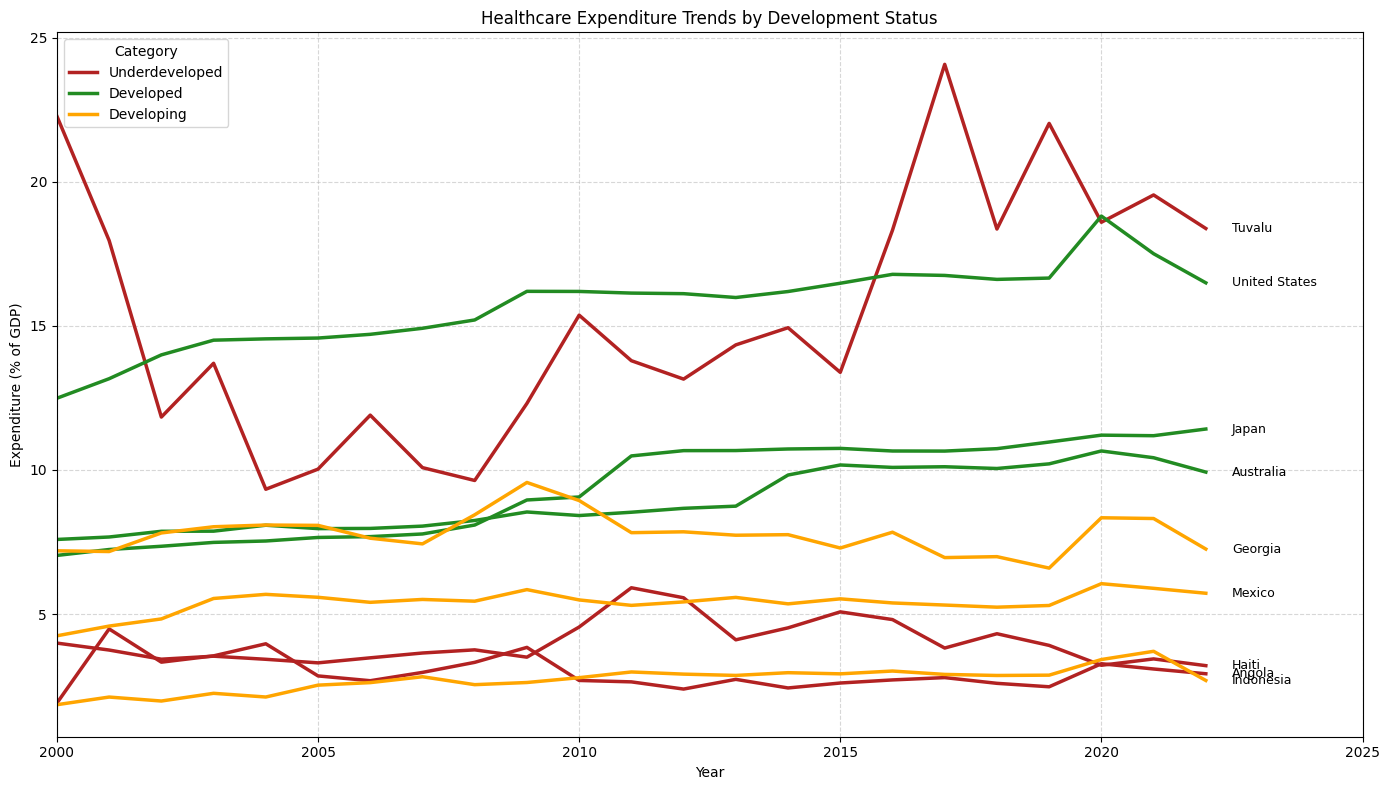

In [ ]:
country_groups = {
    "USA": "Developed",
    "JPN": "Developed",
    "AUS": "Developed",
    "IDN": "Developing",
    "MEX": "Developing",
    "GEO": "Developing",
    "HTI": "Underdeveloped",
    "TUV": "Underdeveloped",
    "AGO": "Underdeveloped",
}

# Select only the countries in the dictionary above
health_subset = health[health["Country Code"].isin(country_groups.keys())].copy()

# Create a new column 'Category' by mapping the Country Code to the dictionary
health_subset["Category"] = health_subset["Country Code"].map(country_groups)

# Turn the year columns into rows
health_long = health_subset.melt(
    id_vars=["Country Name", "Country Code", "Category"],
    var_name="Year",
    value_name="Expenditure",
)

# Ensure Year is numeric
health_long["Year"] = pd.to_numeric(health_long["Year"], errors="coerce")

# Visualize the chart
plt.figure(figsize=(14, 8))  # Made width a bit larger to fit text

# Plot the lines
sns.lineplot(
    data=health_long,
    x="Year",
    y="Expenditure",
    hue="Category",  # Colors lines by Developed/Developing/Underdeveloped
    units="Country Name",  # Tells Python these are separate entities
    estimator=None,  # Tells Python NOT to average them, draw each line individually
    linewidth=2.5,
    palette={
        "Developed": "forestgreen",
        "Developing": "orange",
        "Underdeveloped": "firebrick",
    },
)


# Loop through every unique country to find where its line ends
for country in health_long["Country Name"].unique():
    # Get data for this specific country
    country_data = health_long[health_long["Country Name"] == country]

    # Find the row with the maximum Year (the end of the line)
    last_point = country_data.sort_values("Year").iloc[-1]

    # Place the text at that x,y coordinate
    plt.text(
        x=last_point["Year"] + 0.5,  # Move text slightly to the right of the dot
        y=last_point["Expenditure"],  # Same height as the dot
        s=country,  # The text to write
        color="black",  # Text color
        fontsize=9,
        fontweight="regular",
        verticalalignment="center",  # Centers text vertically on the line
    )


plt.title("Healthcare Expenditure Trends by Development Status")
plt.ylabel("Expenditure (% of GDP)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)

# Expand the X-axis limits slightly so the names don't get cut off
plt.xlim(health_long["Year"].min(), health_long["Year"].max() + 3)


plt.legend(title="Category", loc="upper left")

plt.tight_layout()
plt.show()

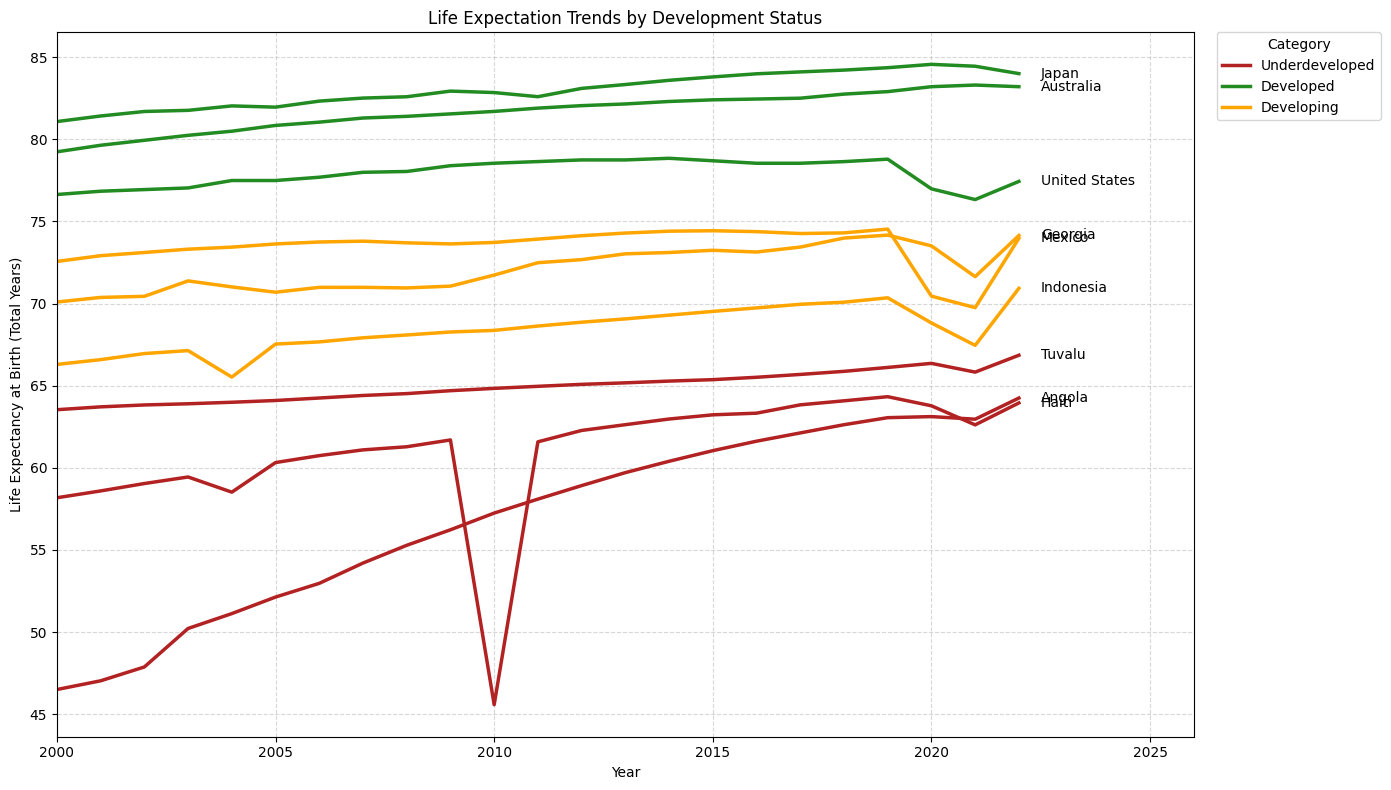

In [ ]:
# Select only the countries in the dictionary above
life_subset = life[life["Country Code"].isin(country_groups.keys())].copy()

# Create a new column 'Category' by mapping the Country Code to the dictionary
life_subset["Category"] = life_subset["Country Code"].map(country_groups)

# Turn the year columns into rows
life_long = life_subset.melt(
    id_vars=["Country Name", "Country Code", "Category"],
    var_name="Year",
    value_name="Life Expectancy",
)

# Ensure Year is numeric (removes any errors)
life_long["Year"] = pd.to_numeric(life_long["Year"], errors="coerce")

# Visualization
plt.figure(figsize=(14, 8))  # I increased the width slightly to make room for the text

# Using 'hue' to color by Category
sns.lineplot(
    data=life_long,
    x="Year",
    y="Life Expectancy",
    hue="Category",  # Colors lines by Developed/Developing/Underdeveloped
    units="Country Name",  # Tells Python to treat countries as separate entities
    estimator=None,  # Tells Python NOT to average them together
    linewidth=2.5,
    palette={
        "Developed": "forestgreen",
        "Developing": "orange",
        "Underdeveloped": "firebrick",
    },
)


# Loop through every unique country to find the end of its line
for country in life_long["Country Name"].unique():
    # 1. Get the data for just this country
    country_data = life_long[life_long["Country Name"] == country]

    # 2. Find the last data point (the maximum year)
    last_point = country_data.sort_values("Year").iloc[-1]

    # 3. Add the text next to that point
    plt.text(
        x=last_point["Year"] + 0.5,  # Move text slightly right of the line end
        y=last_point["Life Expectancy"],
        s=country,
        color="black",
        fontsize=10,
        fontweight="regular",
        verticalalignment="center",  # Centers text vertically on the line tip
    )

plt.title("Life Expectation Trends by Development Status")
plt.ylabel("Life Expectancy at Birth (Total Years)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.5)

# Move legend outside the plot so it doesn't cover the lines
plt.legend(
    bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0, title="Category"
)

# Expand the chart limit slightly to the right so names don't get cut off
plt.xlim(life_long["Year"].min(), life_long["Year"].max() + 4)

plt.tight_layout()
plt.show()

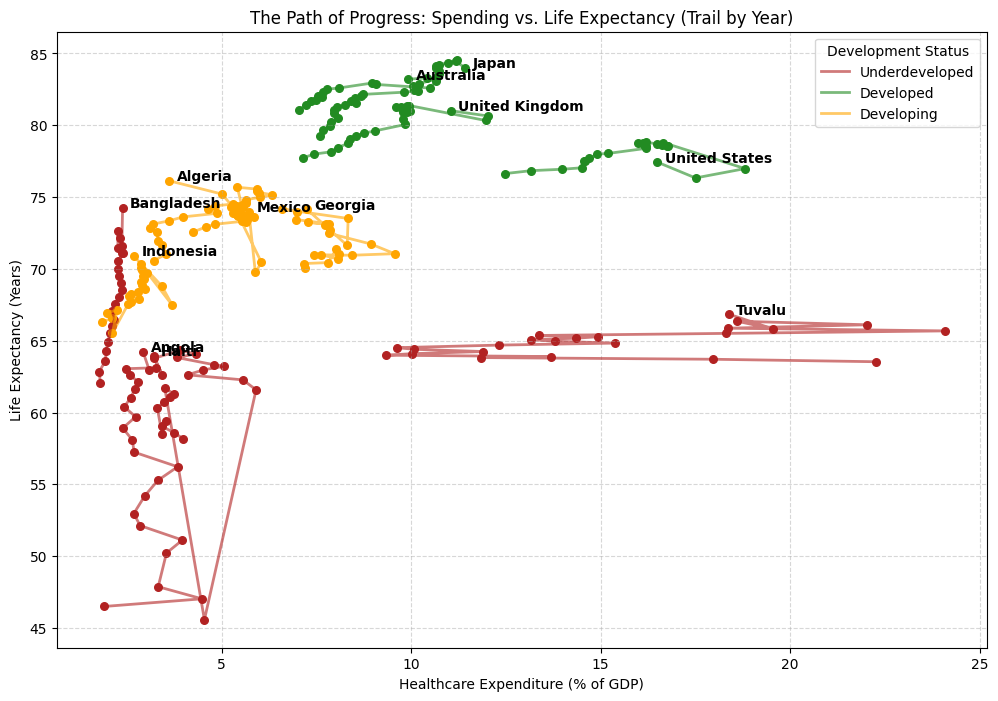

In [ ]:
df_combined = pd.merge(
    health_long, life_long, on=["Country Name", "Country Code", "Category", "Year"]
)


plt.figure(figsize=(12, 8))

# Define colors to match previous charts
my_colors = {
    "Developed": "forestgreen",
    "Developing": "orange",
    "Underdeveloped": "firebrick",
}


# Get a list of all unique countries in your data
countries_list = df_combined["Country Name"].unique()

for country in countries_list:
    # 1. Create a temporary table called 'subset'
    subset = df_combined[df_combined["Country Name"] == country]

    # 2. Sort by Year (Crucial! Otherwise the line scribbles randomly)
    subset = subset.sort_values("Year")

    # 3. Find out which category this country belongs to (to pick the color)
    # .iloc[0] just looks at the first row to grab the category name
    cat_name = subset["Category"].iloc[0]
    line_color = my_colors[cat_name]

    # 4. Plot the Line (The Path over time)
    plt.plot(
        subset["Expenditure"],
        subset["Life Expectancy"],
        color=line_color,
        linewidth=2,
        alpha=0.6,
        label=cat_name,
    )

    # 5. Plot the Dots (The individual years)
    plt.scatter(
        subset["Expenditure"], subset["Life Expectancy"], color=line_color, s=30
    )

    # 6. Label the Country Name at the VERY END of the line (The most recent year)
    # .iloc[-1] gets the last row (the most recent year)
    last_x = subset["Expenditure"].iloc[-1]
    last_y = subset["Life Expectancy"].iloc[-1]
    plt.text(last_x + 0.2, last_y, country, fontsize=10, fontweight="bold")

# Polish the chart
plt.title("The Path of Progress: Spending vs. Life Expectancy (Trail by Year)")
plt.xlabel("Healthcare Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.grid(True, linestyle="--", alpha=0.5)

# Simple trick to fix the Legend (otherwise it lists "Developed" 4 times)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Development Status")

plt.show()